In [9]:
# filepath: compare_statistics.py
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the data from two CSV files
data1 = pd.read_csv('DataChar.csv')  # Replace 'DataChar.csv' with your first file path
data2 = pd.read_csv('DataFred.csv')  # Replace 'DataFred.csv' with your second file path

# Extract the 'Value' column
value1 = data1['Value']
value2 = data2['Value']


# Compute descriptive statistics for both datasets
stats1 = value1.describe()
stats2 = value2.describe()

# # Compute skewness and kurtosis for both datasets
# skewness1 = value1.apply(skew)
# kurtosis1 = value1.apply(kurtosis)
# skewness2 = value2.apply(skew)
# kurtosis2 = value2.apply(kurtosis)

# # Add skewness and kurtosis to the statistics DataFrame
# stats1.loc['skewness'] = skewness1
# stats1.loc['kurtosis'] = kurtosis1
# stats2.loc['skewness'] = skewness2
# stats2.loc['kurtosis'] = kurtosis2

# Print the statistics
print("Statistics for DataChar.csv:")
print(stats1)
print("\nStatistics for DataFred.csv:")
print(stats2)

Statistics for 'Value' column in DataChar.csv:
count       503.000000
mean         -0.003033
std           0.985570
min          -2.049237
25%          -0.783550
50%           0.020282
75%           0.675763
max           2.183461
skewness      0.002214
kurtosis     -0.773293
Name: Value, dtype: float64

Statistics for 'Value' column in DataFred.csv:
count       503.000000
mean          0.026928
std           0.993645
min          -2.246118
25%          -0.695452
50%           0.025194
75%           0.752998
max           2.748362
skewness      0.016647
kurtosis     -0.522444
Name: Value, dtype: float64


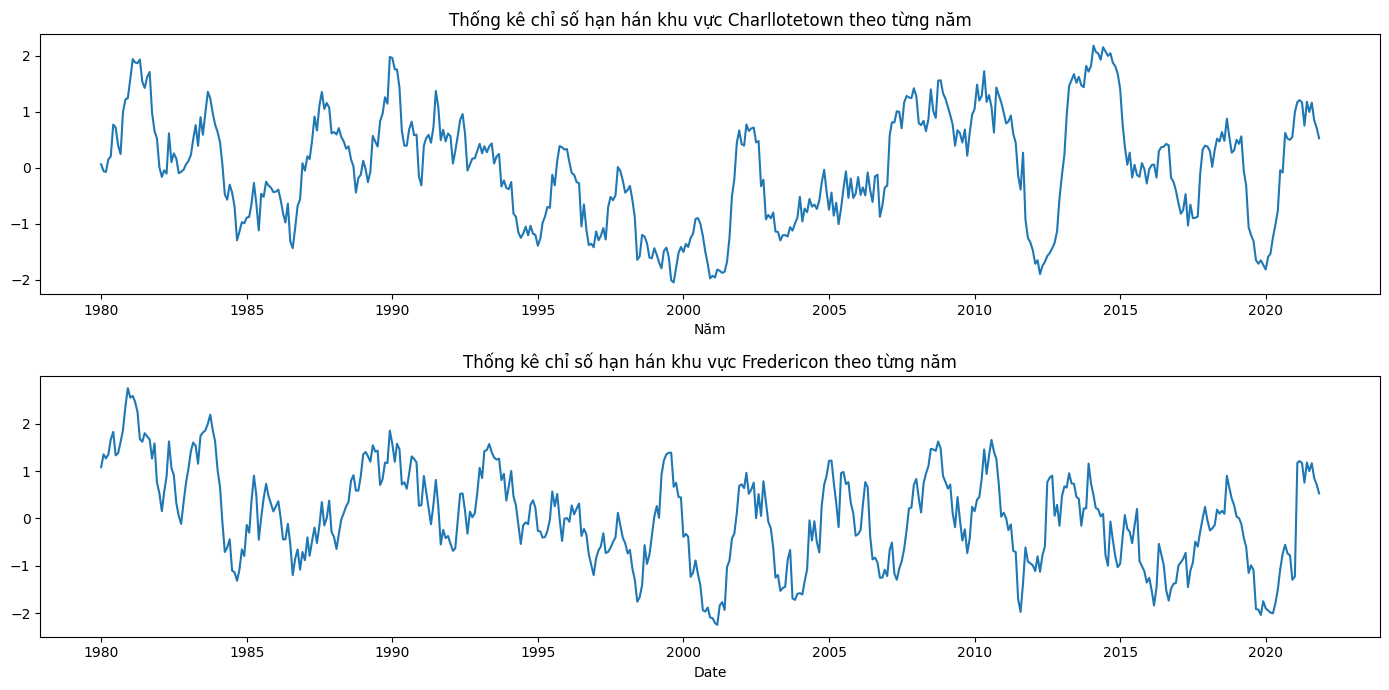

In [34]:
# filepath: visualize_value_month_year.py
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from two CSV files
data1 = pd.read_csv('DataChar.csv')  # Replace 'DataChar.csv' with your first file path
data2 = pd.read_csv('DataFred.csv')  # Replace 'DataFred.csv' with your second file path

# Extract the 'Year', 'Month', and 'Value' columns
year1 = data1['Year']
month1 = data1['Month']
value1 = data1['Value']
year2 = data2['Year']
month2 = data2['Month']
value2 = data2['Value']

# Compute descriptive statistics for the 'Value' column
stats1 = value1.describe()
stats2 = value2.describe()

# Compute skewness and kurtosis for the 'Value' column
skewness1 = skew(value1)
kurtosis1 = kurtosis(value1)
skewness2 = skew(value2)
kurtosis2 = kurtosis(value2)

# Add skewness and kurtosis to the statistics Series
stats1['skewness'] = skewness1
stats1['kurtosis'] = kurtosis1
stats2['skewness'] = skewness2
stats2['kurtosis'] = kurtosis2

# Print the statistics
print("Statistics for 'Value' column in DataChar.csv:")
print(stats1)
print("\nStatistics for 'Value' column in DataFred.csv:")
print(stats2)

# Combine 'Year' and 'Month' into a single datetime column for plotting
data1['Date'] = pd.to_datetime(data1[['Year', 'Month']].assign(DAY=1))
data2['Date'] = pd.to_datetime(data2[['Year', 'Month']].assign(DAY=1))

# Visualize the 'Value' column against 'Date'
plt.figure(figsize=(14, 7))
# Line plot for 'Value' against 'Date' in DataChar.csv
plt.subplot(2, 1, 1)
sns.lineplot(x=data1['Date'], y=value1)
plt.title('Thống kê chỉ số hạn hán khu vực Charllotetown theo từng năm')
plt.xlabel('Năm')
plt.ylabel('')

# Line plot for 'Value' against 'Date' in DataFred.csv
plt.subplot(2, 1, 2)
sns.lineplot(x=data2['Date'], y=value2)
plt.title('Thống kê chỉ số hạn hán khu vực Fredericon theo từng năm')
plt.xlabel('Date')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [15]:
# filepath: correlation_matrix.py
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from two CSV files
data1 = pd.read_csv('DataChar.csv')  # Replace 'DataChar.csv' with your first file path
data2 = pd.read_csv('DataFred.csv')  # Replace 'DataFred.csv' with your second file path

# Extract the 'Value' column
value1 = data1['Value']
value2 = data2['Value']

# Combine the 'Value' columns into a single DataFrame
combined_data = pd.DataFrame({'Char': value1, 'Fred': value2})

# Compute the correlation matrix
correlation_matrix = combined_data.corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận hệ số tương quan giữa chỉ số hạn hán khu vực Charllotetown và Fredericon')
plt.show()

Text(0.5, 1.0, 'Histogram của bộ chỉ số SPEI vùng Charllotetown')

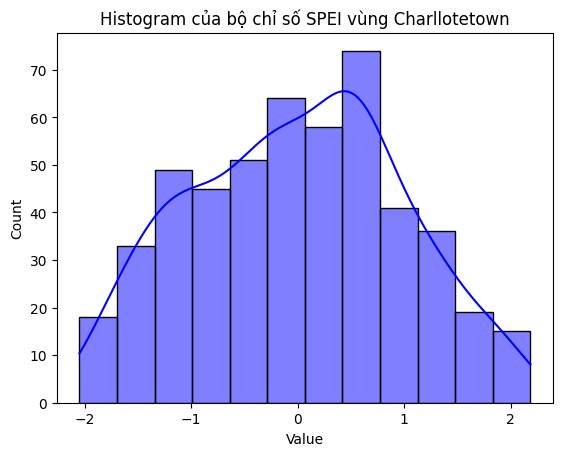

In [42]:
# Histogram for 'Value' column in DataChar.csv
plt.subplot(1,1,1)
sns.histplot(value1, kde=True, color='blue')
plt.title('Histogram của bộ chỉ số SPEI vùng Charllotetown')

Text(0.5, 1.0, 'Histogram của bộ chỉ số vùng Fredericton')

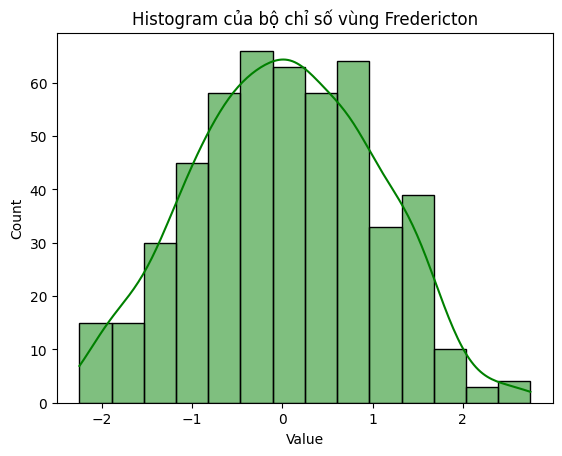

In [45]:

# Histogram for 'Value' column in DataFred.csv
plt.subplot(1,1,1)
sns.histplot(value2, kde=True, color='green')
plt.title('Histogram của bộ chỉ số vùng Fredericton')


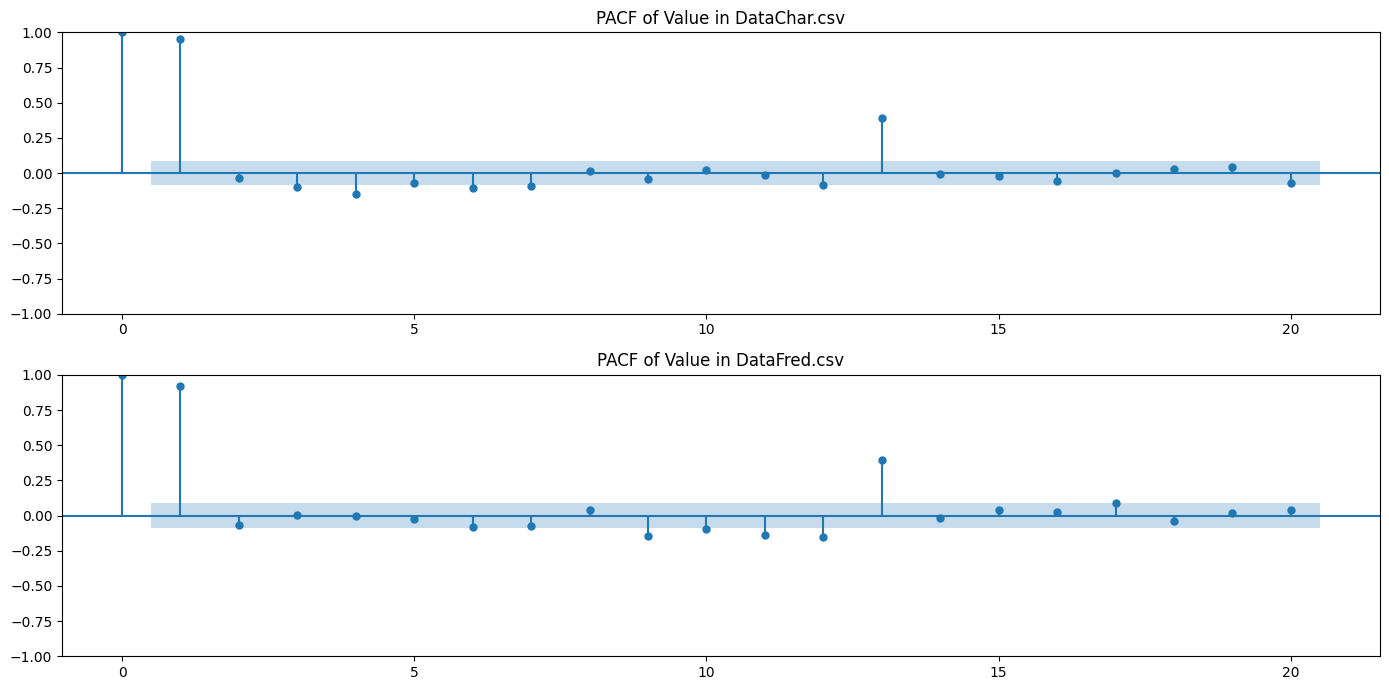

In [46]:
# filepath: pacf_plots.py
from statsmodels.graphics.tsaplots import plot_pacf

# Load the data from two CSV files
data1 = pd.read_csv('DataChar.csv')  # Replace 'DataChar.csv' with your first file path
data2 = pd.read_csv('DataFred.csv')  # Replace 'DataFred.csv' with your second file path

# Extract the 'Value' column
value1 = data1['Value']
value2 = data2['Value']

# Create PACF plots
plt.figure(figsize=(14, 7))

# PACF plot for 'Value' column in DataChar.csv
plt.subplot(2, 1, 1)
plot_pacf(value1, ax=plt.gca(), lags=20)
plt.title('PACF of Value in DataChar.csv')

# PACF plot for 'Value' column in DataFred.csv
plt.subplot(2, 1, 2)
plot_pacf(value2, ax=plt.gca(), lags=20)
plt.title('PACF of Value in DataFred.csv')
plt.tight_layout()
plt.show()

Correlation matrix:
          Char      Fred
Char  1.000000  0.536433
Fred  0.536433  1.000000


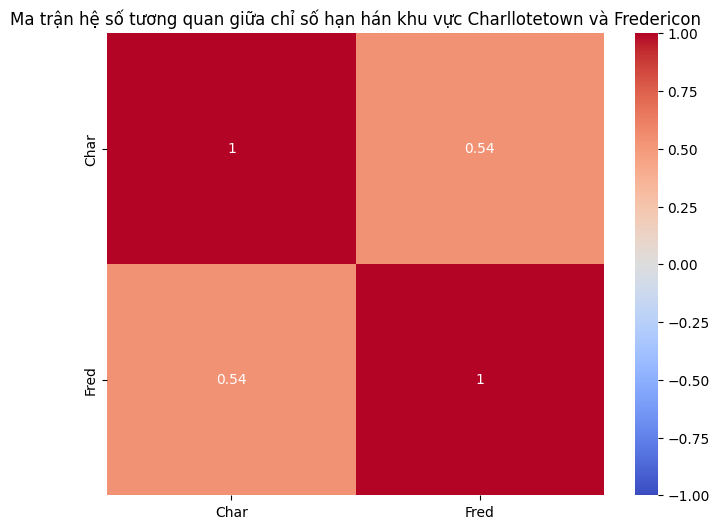

In [15]:
# filepath: correlation_matrix.py
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from two CSV files
data1 = pd.read_csv('DataChar.csv')  # Replace 'DataChar.csv' with your first file path
data2 = pd.read_csv('DataFred.csv')  # Replace 'DataFred.csv' with your second file path

# Extract the 'Value' column
value1 = data1['Value']
value2 = data2['Value']

# Combine the 'Value' columns into a single DataFrame
combined_data = pd.DataFrame({'Char': value1, 'Fred': value2})

# Compute the correlation matrix
correlation_matrix = combined_data.corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận hệ số tương quan giữa chỉ số hạn hán khu vực Charllotetown và Fredericon')
plt.show()

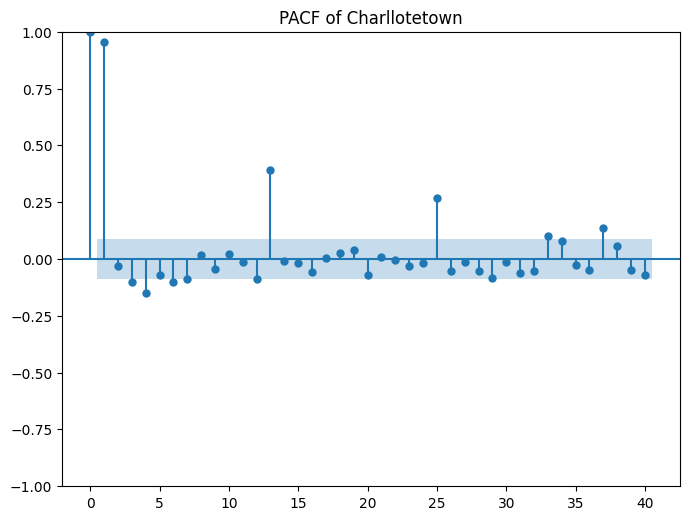

In [47]:
# filepath: pacf_plots.py
from statsmodels.graphics.tsaplots import plot_pacf

# Load the data from two CSV files
data1 = pd.read_csv('DataChar.csv')  # Replace 'DataChar.csv' with your first file path
data2 = pd.read_csv('DataFred.csv')  # Replace 'DataFred.csv' with your second file path

# Extract the 'Value' column
value1 = data1['Value']
value2 = data2['Value']

# Create PACF plots
plt.figure(figsize=(7, 10))

# PACF plot for 'Value' column in DataChar.csv
plt.subplot(2, 1, 1)
plot_pacf(value1, ax=plt.gca(), lags=40)
plt.title('PACF of Charllotetown')

plt.tight_layout()
plt.show()

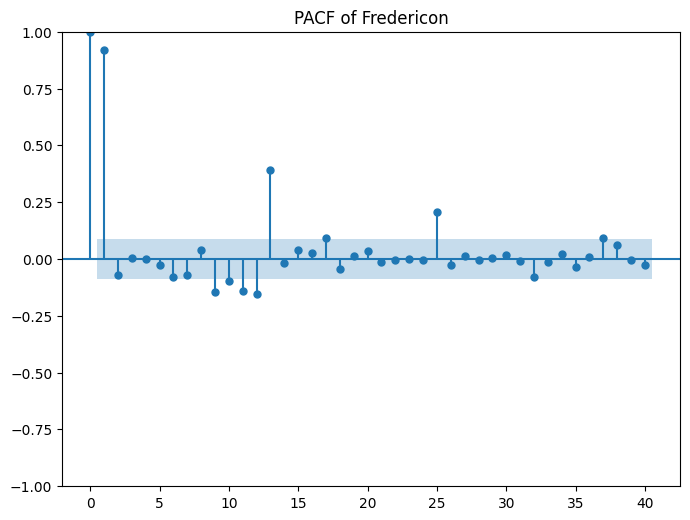

In [51]:
# PACF plot for 'Value' column in DataFred.csv
plt.figure(figsize=(7, 10))
plt.subplot(2, 1, 1)
plot_pacf(value2, ax=plt.gca(), lags=40)
plt.title('PACF of Fredericon')
plt.tight_layout()
plt.show()

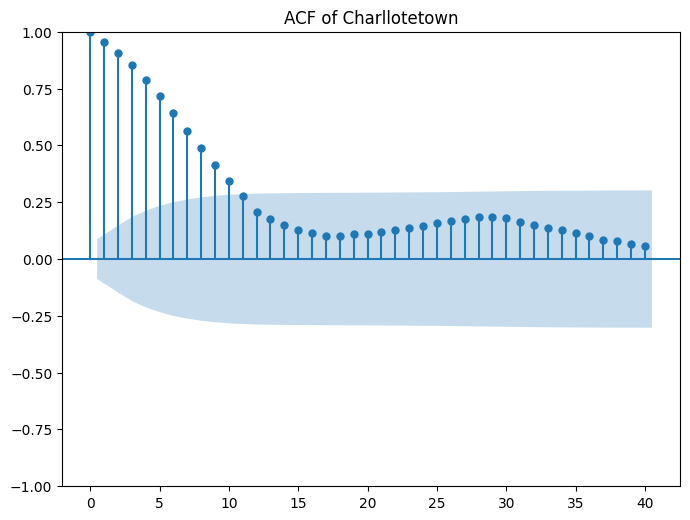

In [53]:
# filepath: acf_plots.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

def plot_acf_for_values(value1, value2, lags=40):
    """
    Plots the ACF for two series of values.

    Parameters:
    value1 (pd.Series): First series of values.
    value2 (pd.Series): Second series of values.
    lags (int): Number of lags to include in the ACF plot.
    """

    plt.figure(figsize=(7, 10))
    # ACF plot for 'Value' column in DataChar.csv
    plt.subplot(2, 1, 1)
    plot_acf(value1, ax=plt.gca(), lags=lags)
    plt.title('ACF of Charllotetown')

    plt.tight_layout()
    plt.show()

# Load the data from two CSV files
data1 = pd.read_csv('DataChar.csv')  # Replace 'DataChar.csv' with your first file path
data2 = pd.read_csv('DataFred.csv')  # Replace 'DataFred.csv' with your second file path

# Extract the 'Value' column
value1 = data1['Value']
value2 = data2['Value']

# Plot ACF for the 'Value' columns
plot_acf_for_values(value1, value2)

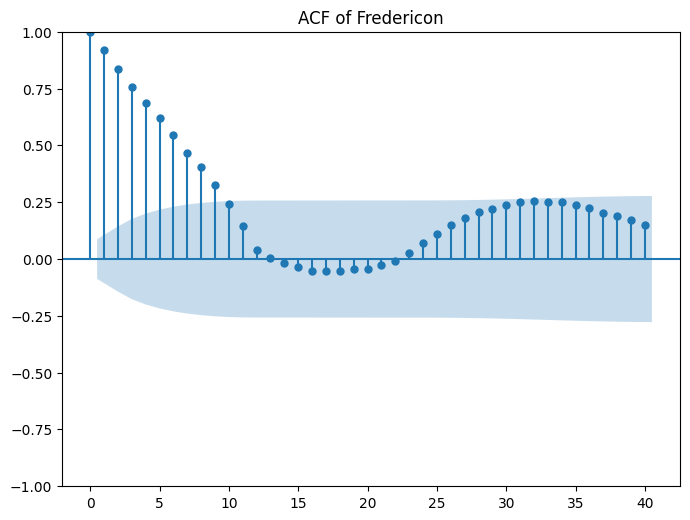

In [55]:
plt.figure(figsize=(7, 10))
# ACF plot for 'Value' column in DataFred.csv
plt.subplot(2, 1, 2)
plot_acf(value2, ax=plt.gca(), lags=40)
plt.title('ACF of Fredericon')
plt.tight_layout()
plt.show()

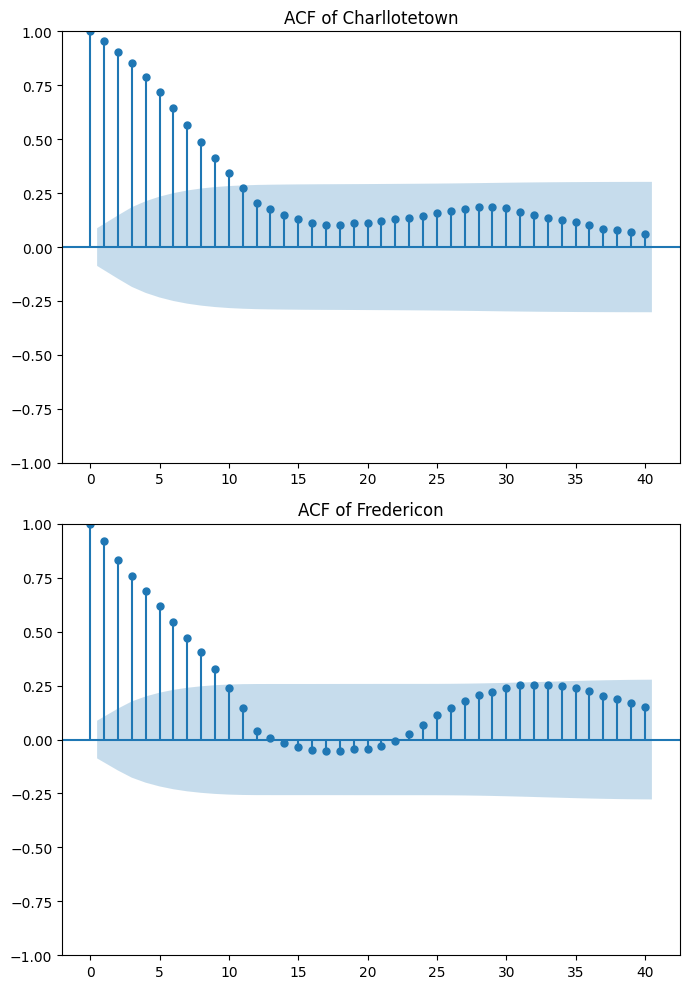

Stationarity test results for 'Value' column in DataChar.csv:
{'Test Statistic': np.float64(-3.389836543143381), 'p-value': np.float64(0.011310261258391525), 'Critical Values': {'1%': np.float64(-3.4437660979098843), '5%': np.float64(-2.8674565460819896), '10%': np.float64(-2.569921291128696)}}

Stationarity test results for 'Value' column in DataFred.csv:
{'Test Statistic': np.float64(-4.8844238068071935), 'p-value': np.float64(3.739254186482478e-05), 'Critical Values': {'1%': np.float64(-3.4437660979098843), '5%': np.float64(-2.8674565460819896), '10%': np.float64(-2.569921291128696)}}


In [29]:
# filepath: ver1.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

def plot_acf_for_values(value1, value2, lags=40):
    """
    Plots the ACF for two series of values.

    Parameters:
    value1 (pd.Series): First series of values.
    value2 (pd.Series): Second series of values.
    lags (int): Number of lags to include in the ACF plot.
    """
    plt.figure(figsize=(7, 10))

    # ACF plot for 'Value' column in DataChar.csv
    plt.subplot(2, 1, 1)
    plot_acf(value1, ax=plt.gca(), lags=lags)
    plt.title('ACF of Charllotetown')

    # ACF plot for 'Value' column in DataFred.csv
    plt.subplot(2, 1, 2)
    plot_acf(value2, ax=plt.gca(), lags=lags)
    plt.title('ACF of Fredericon')

    plt.tight_layout()
    plt.show()

def check_stationarity(series):
    """
    Performs the Augmented Dickey-Fuller test to check the stationarity of a series.

    Parameters:
    series (pd.Series): The time series to test.

    Returns:
    dict: A dictionary containing the test statistic, p-value, and critical values.
    """
    result = adfuller(series)
    return {
        'Test Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

# Load the data from two CSV files
data1 = pd.read_csv('DataChar.csv')  # Replace 'DataChar.csv' with your first file path
data2 = pd.read_csv('DataFred.csv')  # Replace 'DataFred.csv' with your second file path

# Extract the 'Value' column
value1 = data1['Value']
value2 = data2['Value']

# Plot ACF for the 'Value' columns
plot_acf_for_values(value1, value2)

# Check stationarity for the 'Value' columns
stationarity1 = check_stationarity(value1)
stationarity2 = check_stationarity(value2)

# Print the stationarity test results
print("Stationarity test results for 'Value' column in DataChar.csv:")
print(stationarity1)
print("\nStationarity test results for 'Value' column in DataFred.csv:")
print(stationarity2)